In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%pylab inline
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [4]:
raw_data = pd.read_csv('/Users/mahaksharma/Downloads/globalterrorismdb_0617dist.csv',encoding='Latin-1')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
raw_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
raw_data.columns
for each in raw_data.columns:
    print (each)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Columns: 135 entries, eventid to related
dtypes: float64(53), int64(24), object(58)
memory usage: 175.5+ MB


In [9]:
raw_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.703500e+05,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,165744.000000,165744.000000,170346.000000,...,1.279000e+03,4.960000e+02,7.070000e+02,487.000000,9911.000000,9322.000000,170350.000000,170350.000000,170350.000000,170350.000000
mean,2.001776e+11,2001.709997,6.474365,15.466845,0.043634,132.526669,7.091441,23.399774,26.350909,1.454428,...,3.224502e+06,4.519918e+05,3.849663e+05,272.462012,4.624458,-28.717335,-4.583387,-4.510555,0.091083,-3.975128
std,1.314444e+09,13.144146,3.392364,8.817929,0.204279,112.848161,2.949206,18.844885,58.570068,1.009005,...,3.090625e+07,6.070186e+06,2.435027e+06,3130.068208,2.041008,58.737198,4.542694,4.630440,0.583166,4.691492
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.990053e+11,1990.000000,4.000000,8.000000,0.000000,75.000000,5.000000,11.263580,2.396199,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.007121e+11,2007.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.472680,43.130000,1.000000,...,1.420000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014023e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.744167,68.451297,1.000000,...,4.000000e+05,0.000000e+00,7.356800e+02,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017013e+11,2016.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,1.000000e+09,1.320000e+08,4.100000e+07,48000.000000,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
raw_data.shape

(170350, 135)

In [11]:
raw_data['attacktype1']

0         1
1         6
2         1
3         3
4         7
5         2
6         1
7         3
8         7
9         7
10        3
11        7
12        4
13        7
14        7
15        3
16        9
17        3
18        3
19        7
20        7
21        2
22        3
23        3
24        7
25        1
26        3
27        6
28        3
29        7
         ..
170320    2
170321    1
170322    2
170323    2
170324    3
170325    3
170326    1
170327    3
170328    2
170329    6
170330    3
170331    9
170332    3
170333    3
170334    3
170335    3
170336    3
170337    3
170338    2
170339    9
170340    9
170341    9
170342    9
170343    3
170344    3
170345    9
170346    3
170347    6
170348    1
170349    2
Name: attacktype1, Length: 170350, dtype: int64

In [14]:
def eda_helper(df):  
    dict_list = []
    for col in df.columns:
        data = df[col]
        dict_ = {}
  
        dict_.update({"null_count" : data.isnull().sum()})
        
        dict_.update({"unique_count" : len(data.unique())})
        # Finding the types of data in the column
        # This is useful for finding out potential problems with a column having strings and ints
        dict_.update({"data_type" : set([type(d).__name__ for d in data])})
        #dict_.update({"score" : match[1]})
        dict_list.append(dict_)
    eda_df = pd.DataFrame(dict_list)
    eda_df.index = df.columns
   
    return eda_df

In [15]:
eda_helper(raw_data)

,data_type,null_count,unique_count
eventid,{int},0,170350
iyear,{int},0,46
imonth,{int},0,13
iday,{int},0,32
approxdate,"{str, float}",162886,1834
extended,{int},0,2
resolution,"{str, float}",168131,1860
country,{int},0,205
country_txt,{str},0,205
region,{int},0,12


In [16]:
features = raw_data[['iyear', 'imonth', 'iday', 'extended', 'approxdate', 'crit1', 'crit2', 'crit3', 'multiple', 
                    'country_txt', 'region_txt', 'latitude', 'longitude', 'attacktype1', 'attacktype1_txt', 
                    'attacktype2_txt', 'attacktype2', 'attacktype3', 'region', 'weaptype1', 'country',
                    'attacktype3_txt', 'success', 'suicide', 'weaptype1_txt', 'weapsubtype1_txt', 
                    'weapsubtype2_txt', 'weapsubtype3_txt', 'weapsubtype4_txt', 'targtype1_txt', 
                    'corp1', 'natlty1_txt', 'gname', 'gsubname', 'gsubname2', 'gname2', 
                    'nperps', 'nperpcap', 'nkill', 'nkillter', 'nwound', 'property', 
                    'propvalue','nhostkidus', 'ndays', 'ransomamt',
                    'longitude', 'latitude']]

In [17]:
features.head()

,iyear,imonth,iday,extended,approxdate,crit1,crit2,crit3,multiple,country_txt,...,nkill,nkillter,nwound,property,propvalue,nhostkidus,ndays,ransomamt,longitude,latitude
0,1970,7,2,0,NaN,1,1,1,0,Dominican Republic,...,1.0,NaN,0.0,0,NaN,NaN,NaN,NaN,-69.951164,18.456792
1,1970,0,0,0,NaN,1,1,1,0,Mexico,...,0.0,NaN,0.0,0,NaN,0.0,NaN,800000.0,-99.133207,19.432608
2,1970,1,0,0,NaN,1,1,1,0,Philippines,...,1.0,NaN,0.0,0,NaN,NaN,NaN,NaN,120.599741,15.478598
3,1970,1,0,0,NaN,1,1,1,0,Greece,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,23.728157,37.983773
4,1970,1,0,0,NaN,1,1,1,0,Japan,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,130.396361,33.580412


In [18]:
def combine64(years, months=1, days=1, weeks=None, hours=None, minutes=None,
              seconds=None, milliseconds=None, microseconds=None, nanoseconds=None):
    years = np.asarray(years) - 1970
    months = np.asarray(months) - 1
    days = np.asarray(days) - 1
    types = ('<M8[Y]', '<m8[M]', '<m8[D]', '<m8[W]', '<m8[h]',
             '<m8[m]', '<m8[s]', '<m8[ms]', '<m8[us]', '<m8[ns]')
    vals = (years, months, days, weeks, hours, minutes, seconds,
            milliseconds, microseconds, nanoseconds)
    return sum(np.asarray(v, dtype=t) for t, v in zip(types, vals)
               if v is not None)

In [19]:
features['datetime']=combine64(features['iyear'], features['imonth'], features['iday'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
features.head()

,iyear,imonth,iday,extended,approxdate,crit1,crit2,crit3,multiple,country_txt,...,nkillter,nwound,property,propvalue,nhostkidus,ndays,ransomamt,longitude,latitude,datetime
0,1970,7,2,0,NaN,1,1,1,0,Dominican Republic,...,NaN,0.0,0,NaN,NaN,NaN,NaN,-69.951164,18.456792,1970-07-02
1,1970,0,0,0,NaN,1,1,1,0,Mexico,...,NaN,0.0,0,NaN,0.0,NaN,800000.0,-99.133207,19.432608,1969-11-30
2,1970,1,0,0,NaN,1,1,1,0,Philippines,...,NaN,0.0,0,NaN,NaN,NaN,NaN,120.599741,15.478598,1969-12-31
3,1970,1,0,0,NaN,1,1,1,0,Greece,...,NaN,NaN,1,NaN,NaN,NaN,NaN,23.728157,37.983773,1969-12-31
4,1970,1,0,0,NaN,1,1,1,0,Japan,...,NaN,NaN,1,NaN,NaN,NaN,NaN,130.396361,33.580412,1969-12-31


In [21]:
easy_df = features[['attacktype1', 'country_txt', 'country', 'weaptype1_txt', 'weaptype1', 'iyear', 'longitude','latitude']]
easy_df.head()

,attacktype1,country_txt,country,weaptype1_txt,weaptype1,iyear,longitude,longitude,latitude,latitude
0,1,Dominican Republic,58,Unknown,13,1970,-69.951164,-69.951164,18.456792,18.456792
1,6,Mexico,130,Unknown,13,1970,-99.133207,-99.133207,19.432608,19.432608
2,1,Philippines,160,Unknown,13,1970,120.599741,120.599741,15.478598,15.478598
3,3,Greece,78,Explosives/Bombs/Dynamite,6,1970,23.728157,23.728157,37.983773,37.983773
4,7,Japan,101,Incendiary,8,1970,130.396361,130.396361,33.580412,33.580412


In [22]:
easy_df = easy_df[easy_df.weaptype1==6] 

In [23]:
easy_df['country_txt'].value_counts

<bound method IndexOpsMixin.value_counts of 3                     Greece
7              United States
10             United States
15        East Germany (GDR)
17             United States
18             United States
22             United States
23             United States
26               Philippines
28             United States
31             United States
35             United States
36             United States
37             United States
40             United States
46             United States
47             United States
48             United States
49             United States
55             United States
56             United States
57             United States
58             United States
61             United States
63             United States
64             United States
66             United States
67             United States
68             United States
70             United States
                 ...        
170280                 Syria
170285                 Yemen

In [24]:
countries=easy_df.country_txt.unique()
dicti={}
for item in countries:
    dicti[item]=(easy_df[easy_df['country_txt']==item].groupby('iyear').attacktype1.count())

In [25]:
df_tab = pd.DataFrame(dicti)
df_tab.head(5)

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,Venezuela,Vietnam,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
iyear,,,,,,,,,,,,,,,,,,,,,
1970,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1971,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1972,NaN,NaN,NaN,NaN,8.0,NaN,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
1973,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,9.0,NaN,NaN,1.0,1.0,1.0,NaN
1974,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,12.0,NaN,NaN,1.0,NaN,NaN,NaN


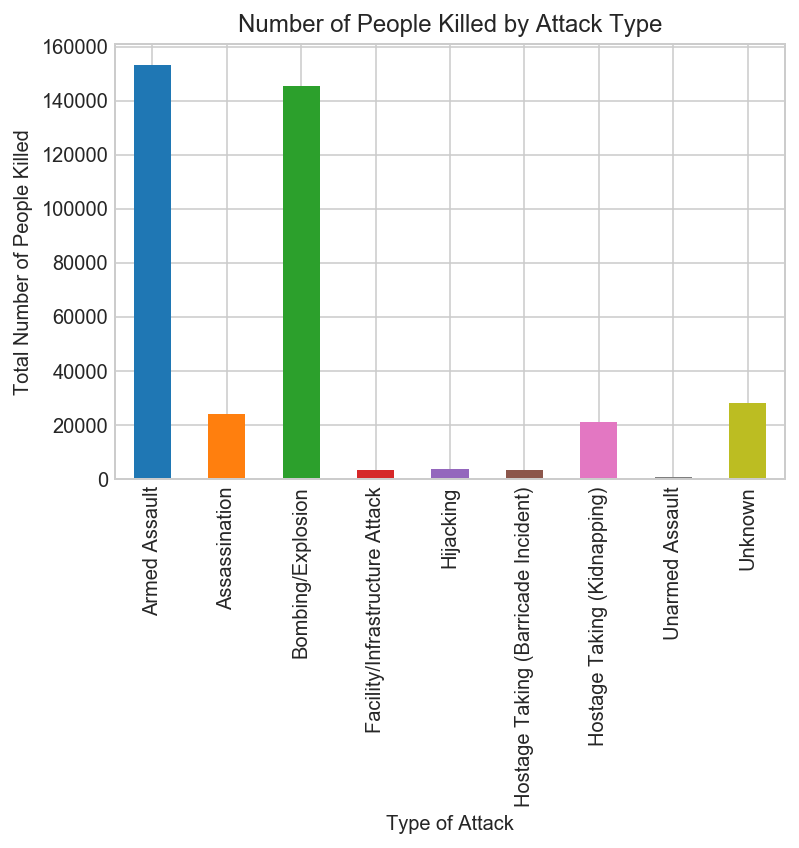

In [26]:
#Visulisations
features.groupby('attacktype1_txt').nkill.sum().plot(kind='bar')
plt.title('Number of People Killed by Attack Type')
plt.xlabel('Type of Attack')
plt.ylabel('Total Number of People Killed')
pylab.rcParams['figure.figsize'] = (11, 7)


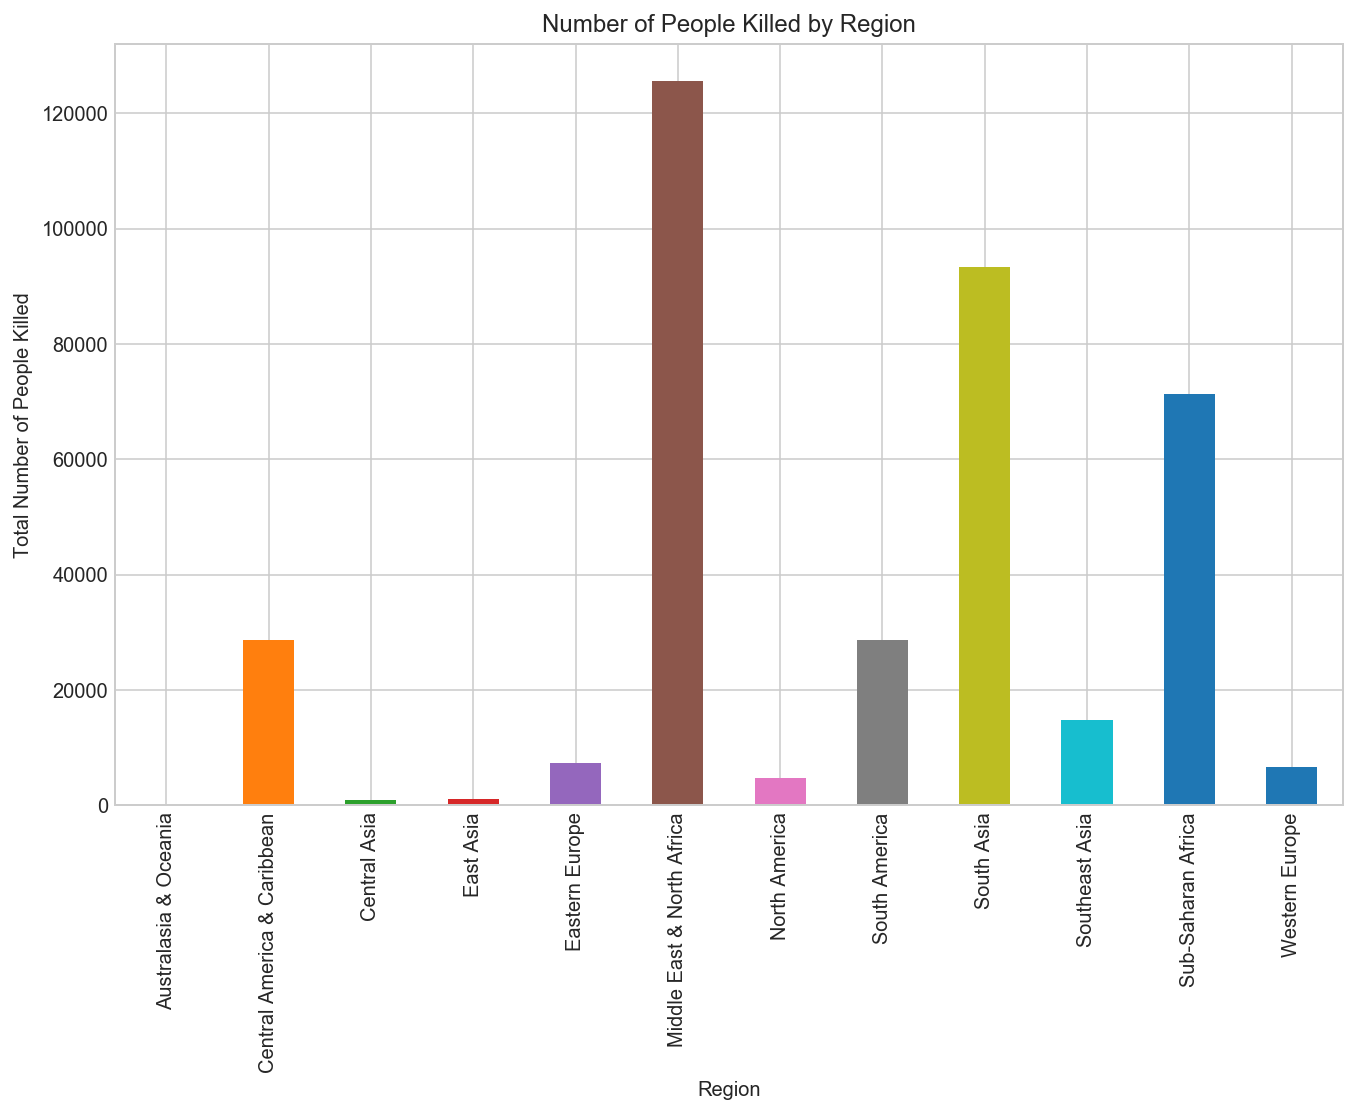

In [27]:
features.groupby('region_txt').nkill.sum().plot(kind='bar')
plt.title('Number of People Killed by Region')
plt.xlabel('Region')
plt.ylabel('Total Number of People Killed')
pylab.rcParams['figure.figsize'] = (11, 7)

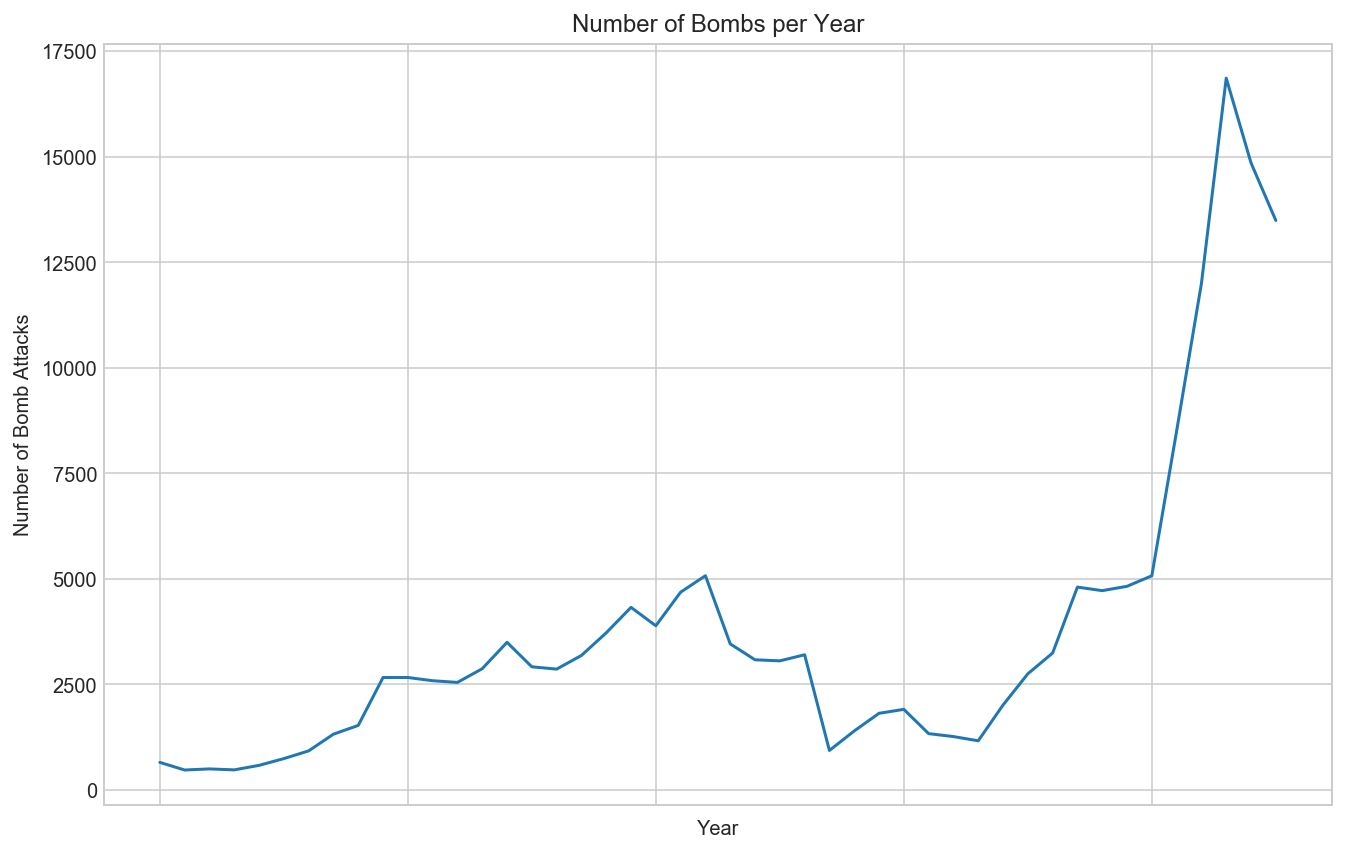

In [28]:
features.groupby('iyear').iyear.value_counts().plot(kind='line', )
plt.title('Number of Bombs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bomb Attacks')
pylab.rcParams['figure.figsize'] = (11, 7)

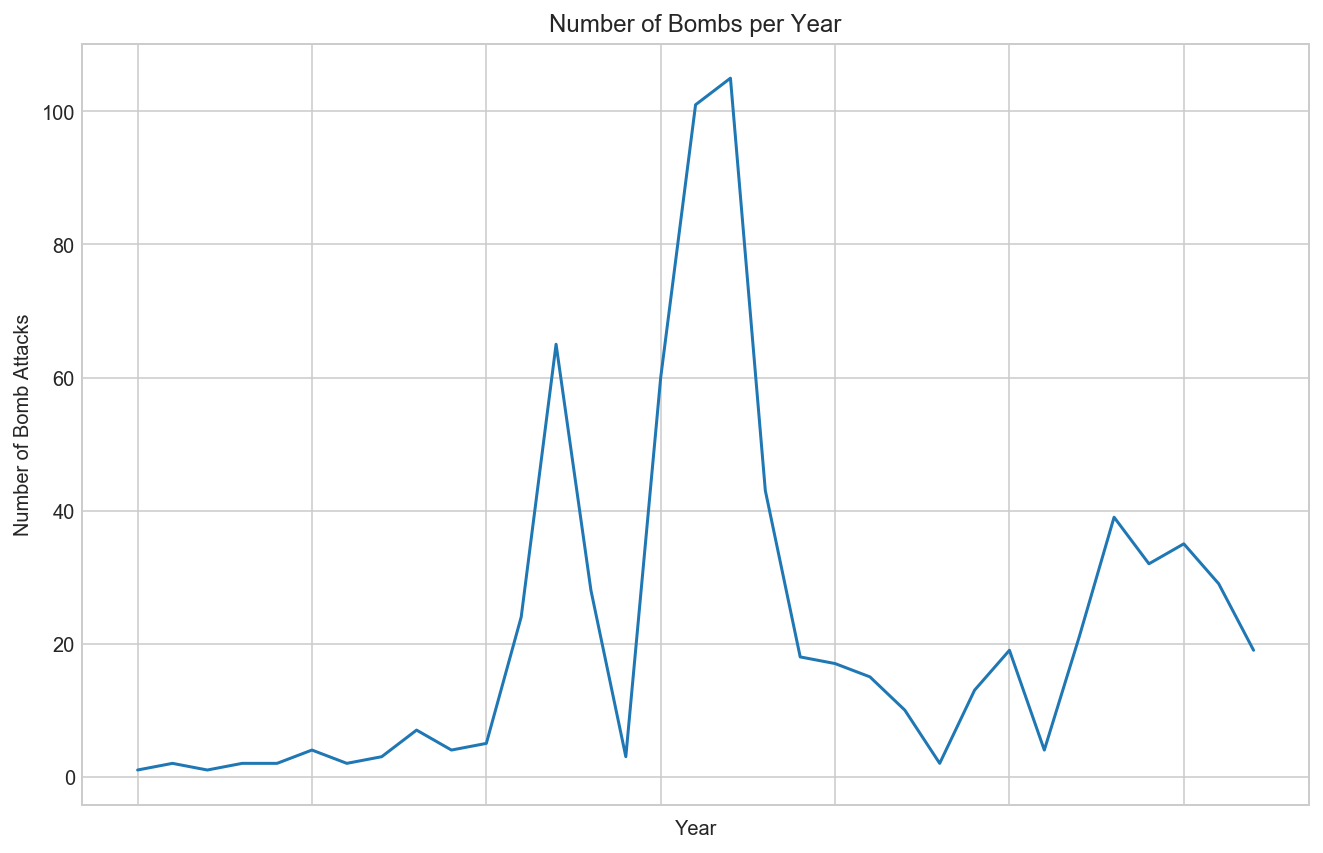

In [29]:
features_indo = features[features.country == 93]
features_indo.groupby('iyear').iyear.value_counts().plot(kind='line')
plt.title('Number of Bombs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bomb Attacks')
pylab.rcParams['figure.figsize'] = (11, 7)


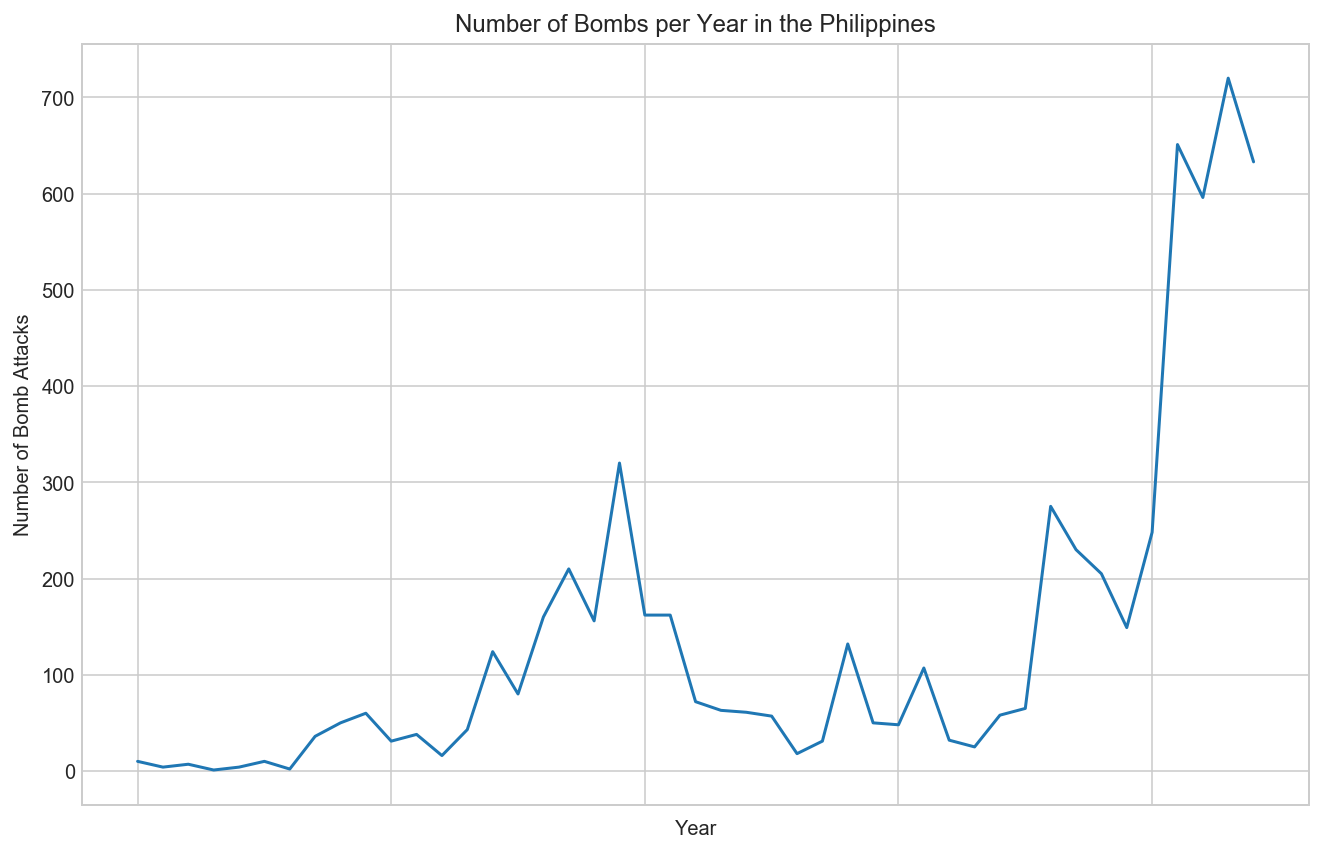

In [30]:
features_indo = features[features.country == 160]
features_indo.groupby('iyear').iyear.value_counts().plot(kind='line')
plt.title('Number of Bombs per Year in the Philippines')
plt.xlabel('Year')
plt.ylabel('Number of Bomb Attacks')
pylab.rcParams['figure.figsize'] = (11, 7)

Bayesian Inference

In [32]:
import pymc3 as pm

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [33]:
features['attacktype1'].value_counts()

3    83073
2    40223
1    18402
6    10233
7     9581
9     6425
8      913
5      902
4      598
Name: attacktype1, dtype: int64

In [34]:
df_attacktype1 = features[(features['attacktype1'] == 3) & (features['country']==160)]

In [35]:
df_attacktype1_pre = df_attacktype1[(df_attacktype1.iyear < 2010)]
df_attacktype1_post = df_attacktype1[(df_attacktype1.iyear >= 2010)]

In [36]:
pre_phil = df_attacktype1_pre.iyear.groupby(df_attacktype1_pre['iyear']).value_counts()
post_phil = df_attacktype1_post.iyear.groupby(df_attacktype1_post['iyear']).value_counts()
print (pre_phil.head(10))
print (post_phil.head())


iyear  iyear
1970   1970      6
1971   1971      3
1972   1972      2
1975   1975      1
1976   1976      1
1978   1978     16
1979   1979      3
1980   1980     44
1981   1981      7
1982   1982     12
Name: iyear, dtype: int64
iyear  iyear
2010   2010      56
2011   2011      53
2012   2012     111
2013   2013     181
2014   2014     162
Name: iyear, dtype: int64


In [37]:
mean_prior_mean = pre_phil.mean()
mean_prior_std = pre_phil.std()
print (mean_prior_mean)
print (mean_prior_std)

29.27777777777778
32.922949972938866


In [38]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
#indo_num = df_attacktype1_post[(df_attacktype1_post.country == 93)].iyear.value_counts().values
#print ('Number of bombings in Indonesia', zip(years, indo_num))
#phil_num = df_attacktype1_post[(df_attacktype1_post.country == 160)].iyear.value_counts().values
print ('Number of bombings in the Philippines', zip(years, post_phil))

Number of bombings in the Philippines <zip object at 0x10bdbf208>


In [39]:
# model specifications in PyMC3 are wrapped in a with-statement
# The priors both have the original mean of 29 bombings. 
with pm.Model() as model:
# Means 
    pre_mean = pm.Normal('Pre_mean', mean_prior_mean, sd=mean_prior_std)
    post_mean = pm.Normal('Post_mean', mean_prior_mean, sd=mean_prior_std)

In [40]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
# Standard Deviations     
    pre_phil_std = pm.Uniform('Pre_phil_std', lower=std_prior_lower, upper=std_prior_upper)
    post_phil_std = pm.Uniform('Post_phil_std', lower=std_prior_lower, upper=std_prior_upper)

In [41]:
with model:
# Likelihoods 
    pre = pm.Normal('Pre', mu=pre_mean, sd=pre_phil_std, observed=pre_phil)
    post = pm.Normal('Post', mu=post_mean, sd=post_phil_std, observed=post_phil)

In [42]:
with model:
# Differences 
    diff_of_means = pm.Deterministic('difference of means', pre_mean - post_mean)
    diff_of_stds = pm.Deterministic('difference of stds', pre_phil_std - post_phil_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((pre_phil_std**2 + post_phil_std**2) / 2))

In [43]:
import time

In [45]:
t0 = time.time()
with model:
    trace = pm.sample(6000, njobs=4)
t1 = time.time()

print (t1 - t0)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Post_phil_std_interval__, Pre_phil_std_interval__, Post_mean, Pre_mean]
 59%|█████▉    | 3851/6500 [00:06<00:04, 557.40it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '4998' (I am process '4999')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/mahaksharma/.theano/compiledir_Darwin-17.4.0-x86_64-i386-64bit-i386-3.6.4-64/lock_dir
 61%|██████    | 3945/6500 [00:07<00:04, 559.66it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '4998' (I am process '5000')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/mahaksharma/.theano/compiledir_Darwin-17.4.0-x86_64-i386-64bit-i386-3.6.4-64/lock_dir
100%|██████████| 6500/6500 [00:09<00:00, 651.34it/s]
INFO (theano.gof.compilelock): Waiting for existing lock by process '4999' (I am process '5000')
INFO (theano.gof.compilelock): T

62.419692039489746


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19958b00>,
      dtype=object)

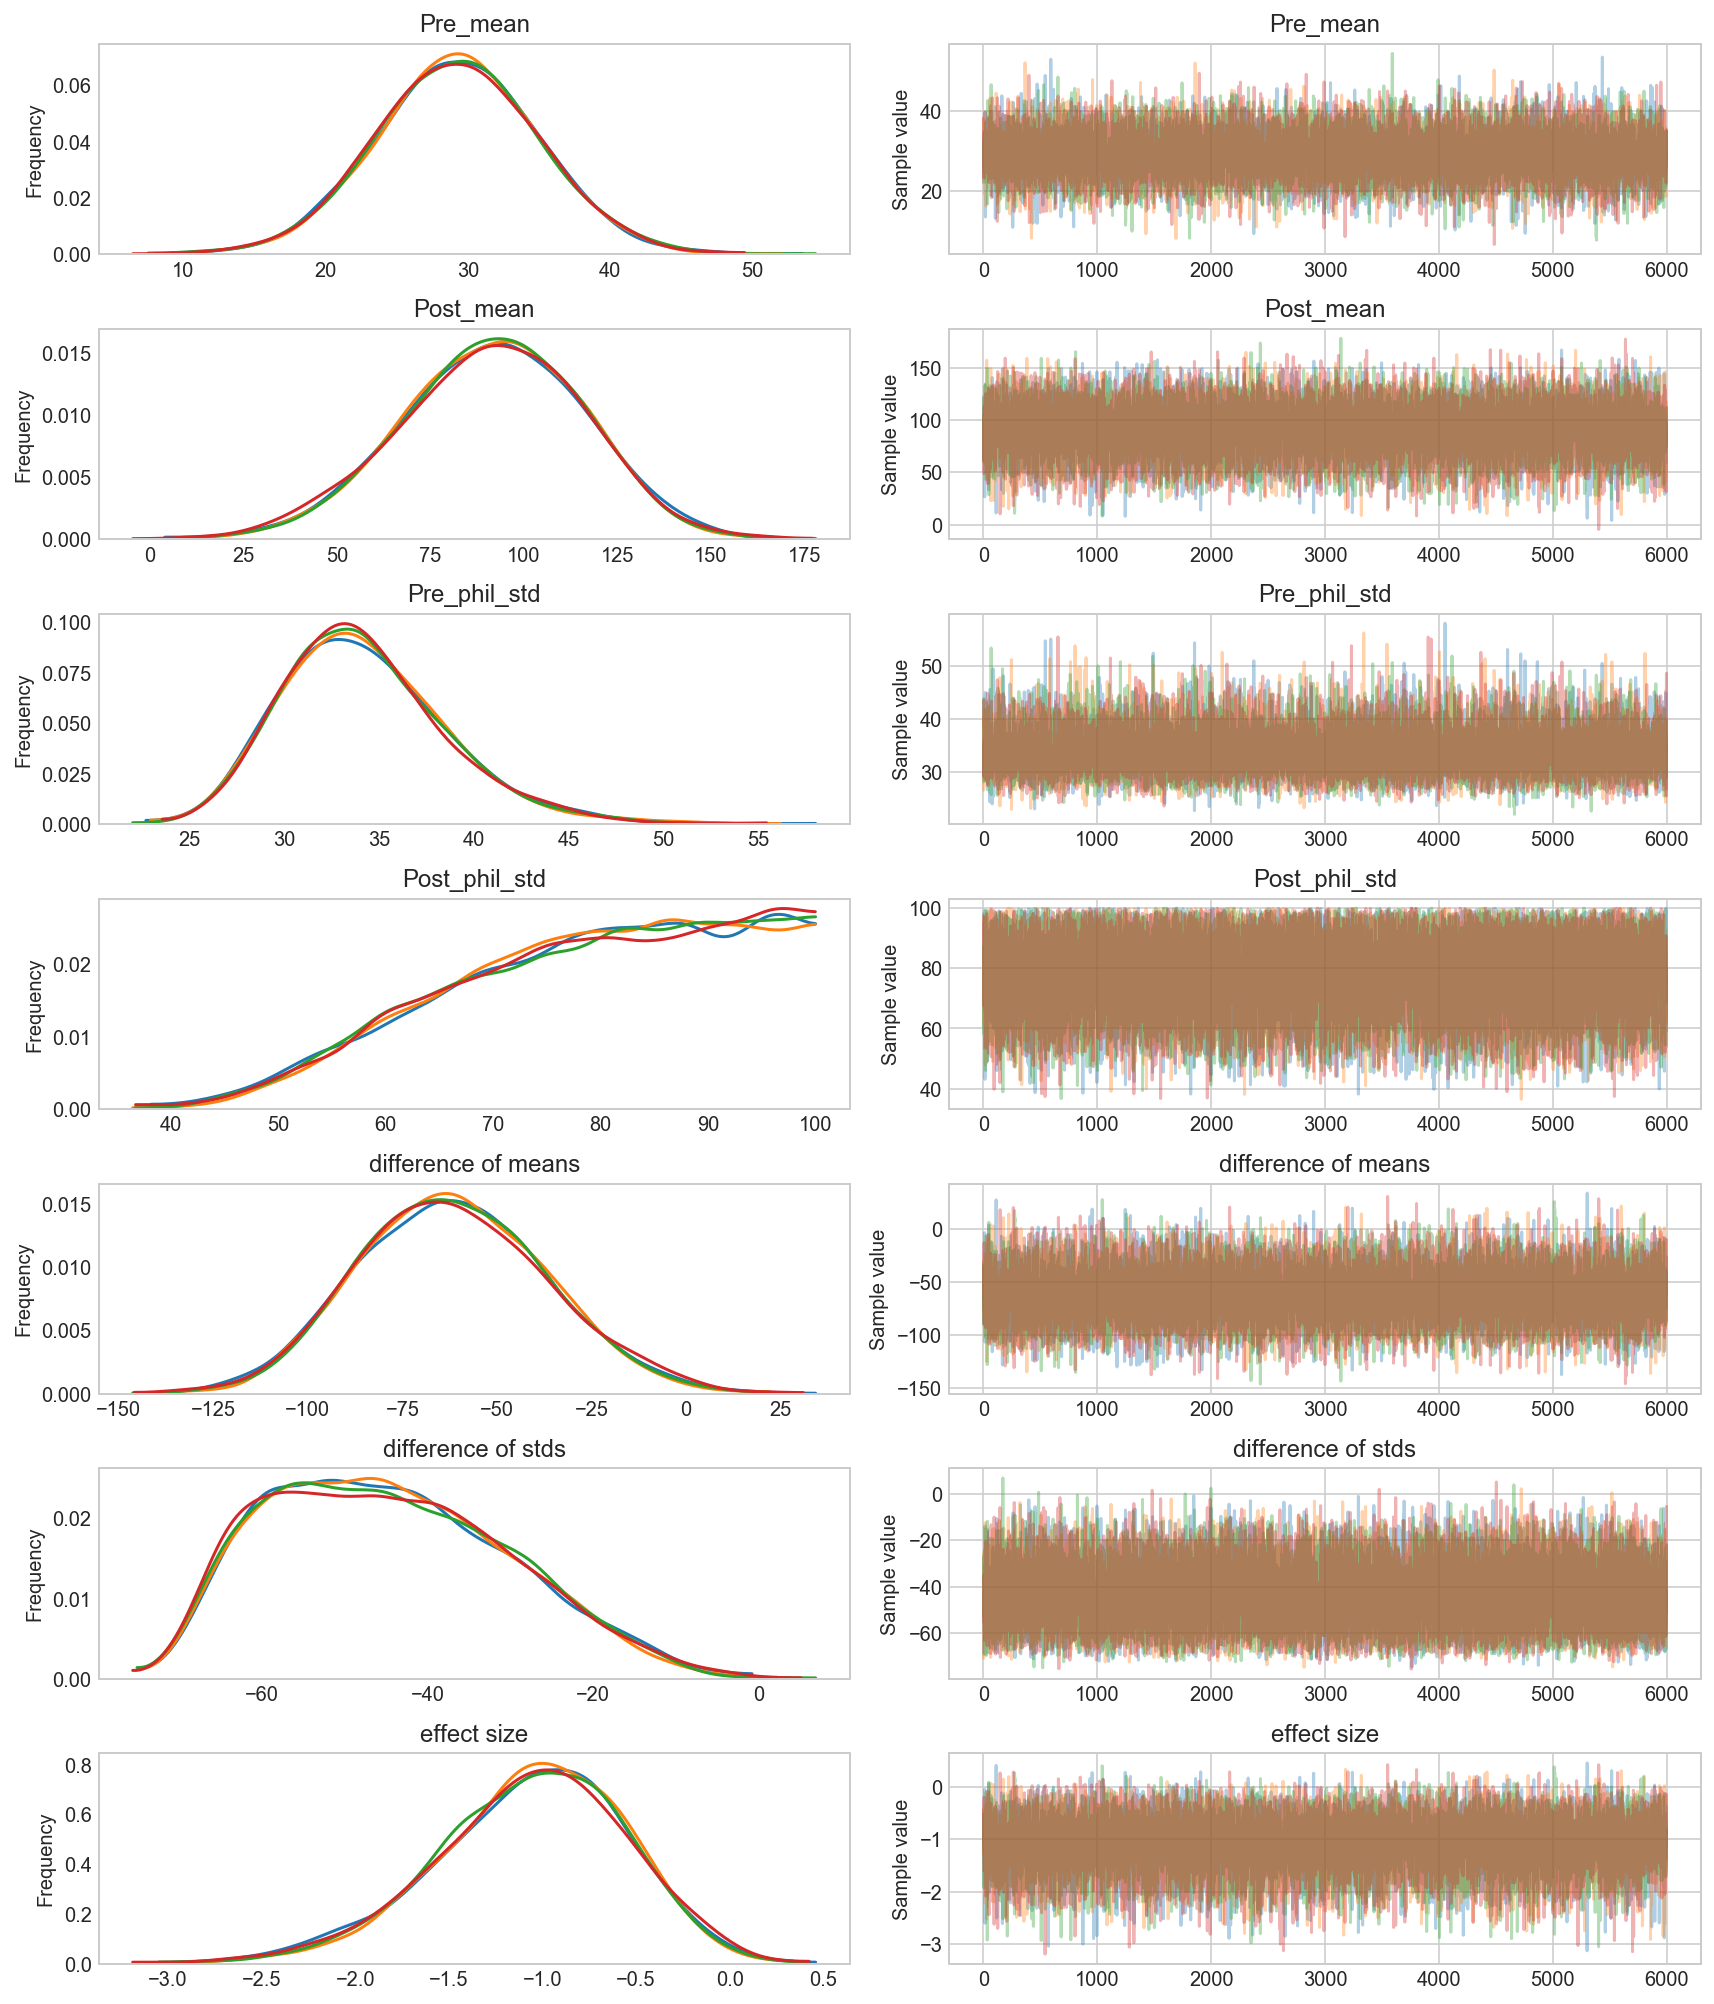

In [46]:
pm.traceplot(trace)

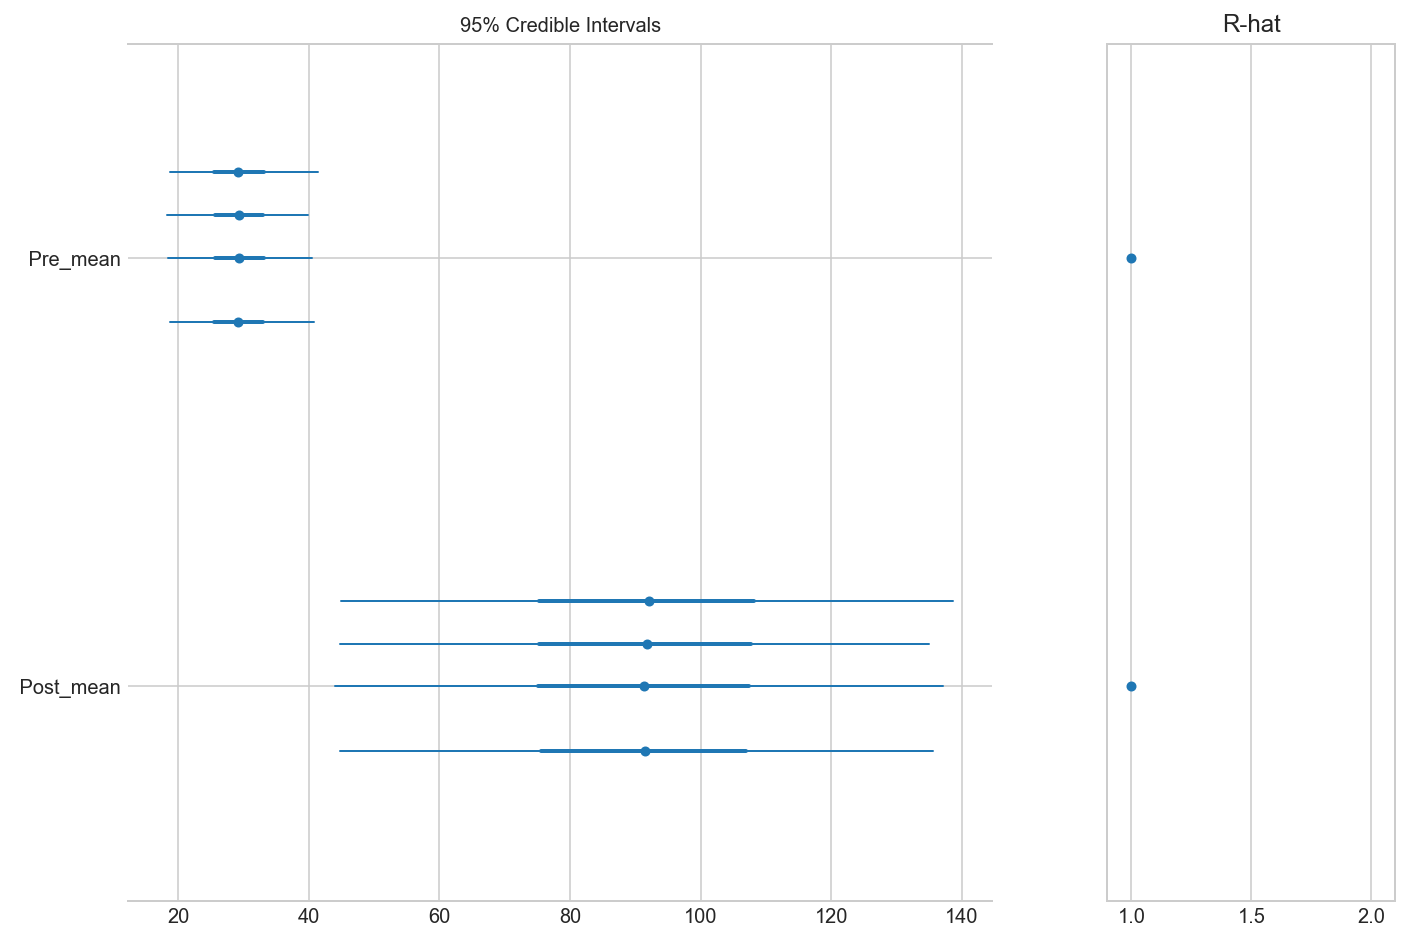

In [47]:
pm.forestplot(trace[2000:], varnames=[v.name for v in model.vars[:2]])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e9191d0>,
      dtype=object)

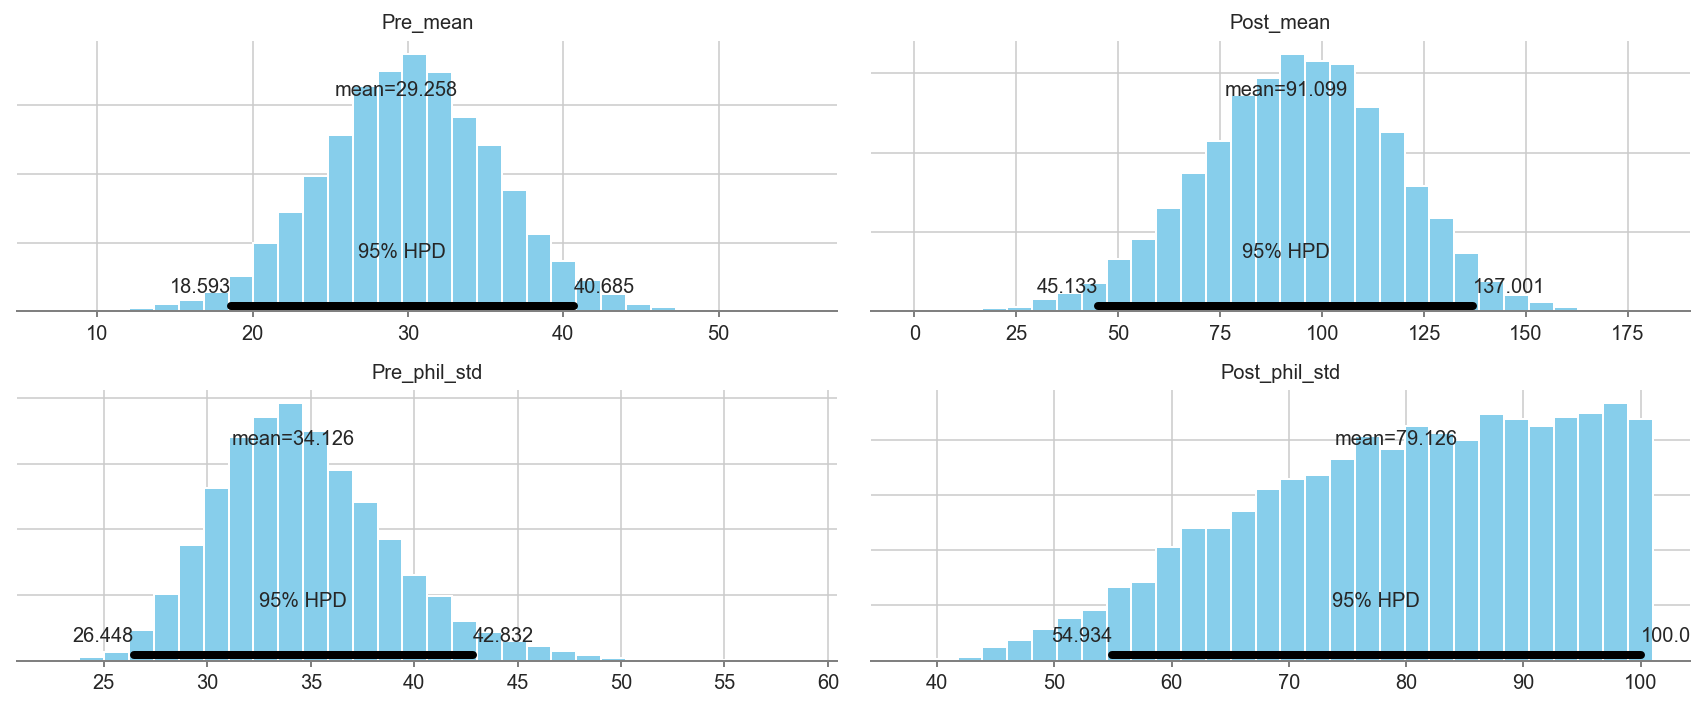

In [48]:
pm.plot_posterior(trace[2000:],
                  varnames=['Pre_mean', 'Post_mean', 'Pre_phil_std', 'Post_phil_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e82ff98>,
      dtype=object)

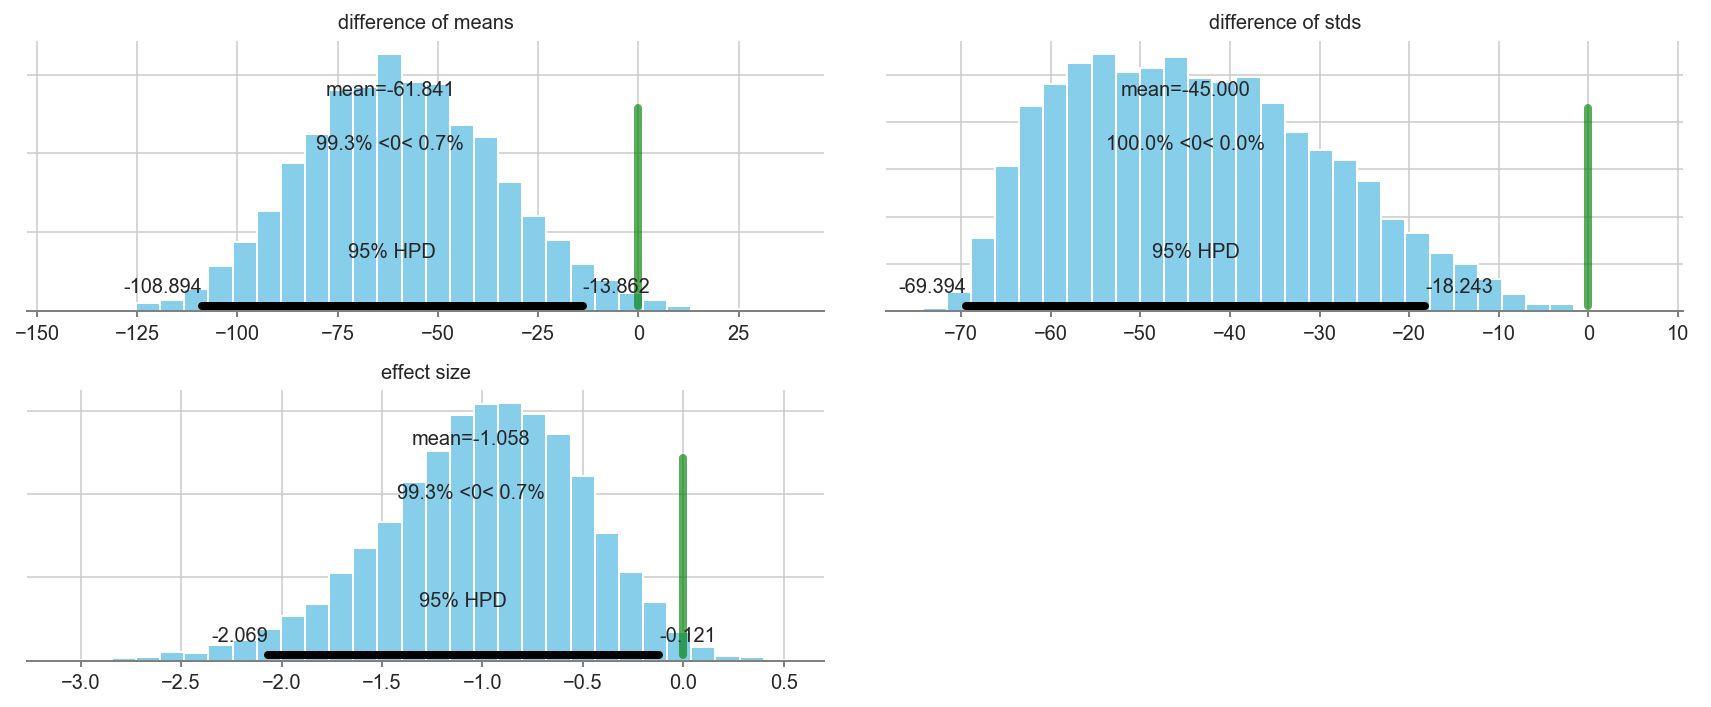

In [49]:
pm.plot_posterior(trace[2000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [50]:
pm.summary(trace,
           varnames=['difference of means', 'difference of stds', 'effect size'])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
difference of means,-62.049624,24.730858,0.180437,-109.001261,-13.281962,17425.810116,0.999925
difference of stds,-44.888998,14.287692,0.115433,-69.053862,-17.905177,12604.310455,0.999937
effect size,-1.064016,0.507157,0.003959,-2.103842,-0.126815,14501.828597,0.999973



Finding Information on Bombings in 1993

In [51]:
features_b = features[features['attacktype1']==3]
features_b.head()

,iyear,imonth,iday,extended,approxdate,crit1,crit2,crit3,multiple,country_txt,...,nkillter,nwound,property,propvalue,nhostkidus,ndays,ransomamt,longitude,latitude,datetime
3,1970,1,0,0,NaN,1,1,1,0,Greece,...,NaN,NaN,1,NaN,NaN,NaN,NaN,23.728157,37.983773,1969-12-31
7,1970,1,2,0,NaN,1,1,1,0,United States,...,0.0,0.0,1,22500.0,NaN,NaN,NaN,-122.273024,37.805065,1970-01-02
10,1970,1,1,0,NaN,1,1,0,0,United States,...,NaN,0.0,0,0.0,NaN,NaN,NaN,-89.744299,43.468500,1970-01-01
15,1970,1,10,0,NaN,1,1,1,0,East Germany (GDR),...,NaN,NaN,0,NaN,NaN,NaN,NaN,13.400000,52.516667,1970-01-10
17,1970,1,12,0,NaN,1,1,1,0,United States,...,0.0,0.0,1,NaN,NaN,NaN,NaN,-73.947971,40.610069,1970-01-12


In [52]:
features_b.sort_index()

,iyear,imonth,iday,extended,approxdate,crit1,crit2,crit3,multiple,country_txt,...,nkillter,nwound,property,propvalue,nhostkidus,ndays,ransomamt,longitude,latitude,datetime
3,1970,1,0,0,NaN,1,1,1,0,Greece,...,NaN,NaN,1,NaN,NaN,NaN,NaN,23.728157,37.983773,1969-12-31
7,1970,1,2,0,NaN,1,1,1,0,United States,...,0.0,0.0,1,22500.0,NaN,NaN,NaN,-122.273024,37.805065,1970-01-02
10,1970,1,1,0,NaN,1,1,0,0,United States,...,NaN,0.0,0,0.0,NaN,NaN,NaN,-89.744299,43.468500,1970-01-01
15,1970,1,10,0,NaN,1,1,1,0,East Germany (GDR),...,NaN,NaN,0,NaN,NaN,NaN,NaN,13.400000,52.516667,1970-01-10
17,1970,1,12,0,NaN,1,1,1,0,United States,...,0.0,0.0,1,NaN,NaN,NaN,NaN,-73.947971,40.610069,1970-01-12
18,1970,1,12,0,NaN,1,1,1,0,United States,...,0.0,0.0,-9,NaN,NaN,NaN,NaN,-65.830948,18.379998,1970-01-12
22,1970,1,19,0,NaN,1,1,1,0,United States,...,0.0,0.0,1,2200.0,NaN,NaN,NaN,-122.317228,47.610594,1970-01-19
23,1970,1,19,0,NaN,1,1,1,0,United States,...,0.0,0.0,0,NaN,NaN,NaN,NaN,-122.303520,47.655335,1970-01-19
26,1970,1,21,0,NaN,1,1,1,0,Philippines,...,NaN,0.0,1,5000.0,NaN,NaN,NaN,121.044348,14.677301,1970-01-21
28,1970,1,22,0,NaN,1,1,1,0,United States,...,0.0,0.0,1,NaN,NaN,NaN,NaN,-96.413949,42.470310,1970-01-22


In [53]:
from statsmodels.tsa.stattools import adfuller

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [55]:
def test_stationarity(timeseries, window):

    #Determing rolling statistics
    
    rolmean = timeseries.rolling(window=window).mean()
    # rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=window).std()
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    return rolmean

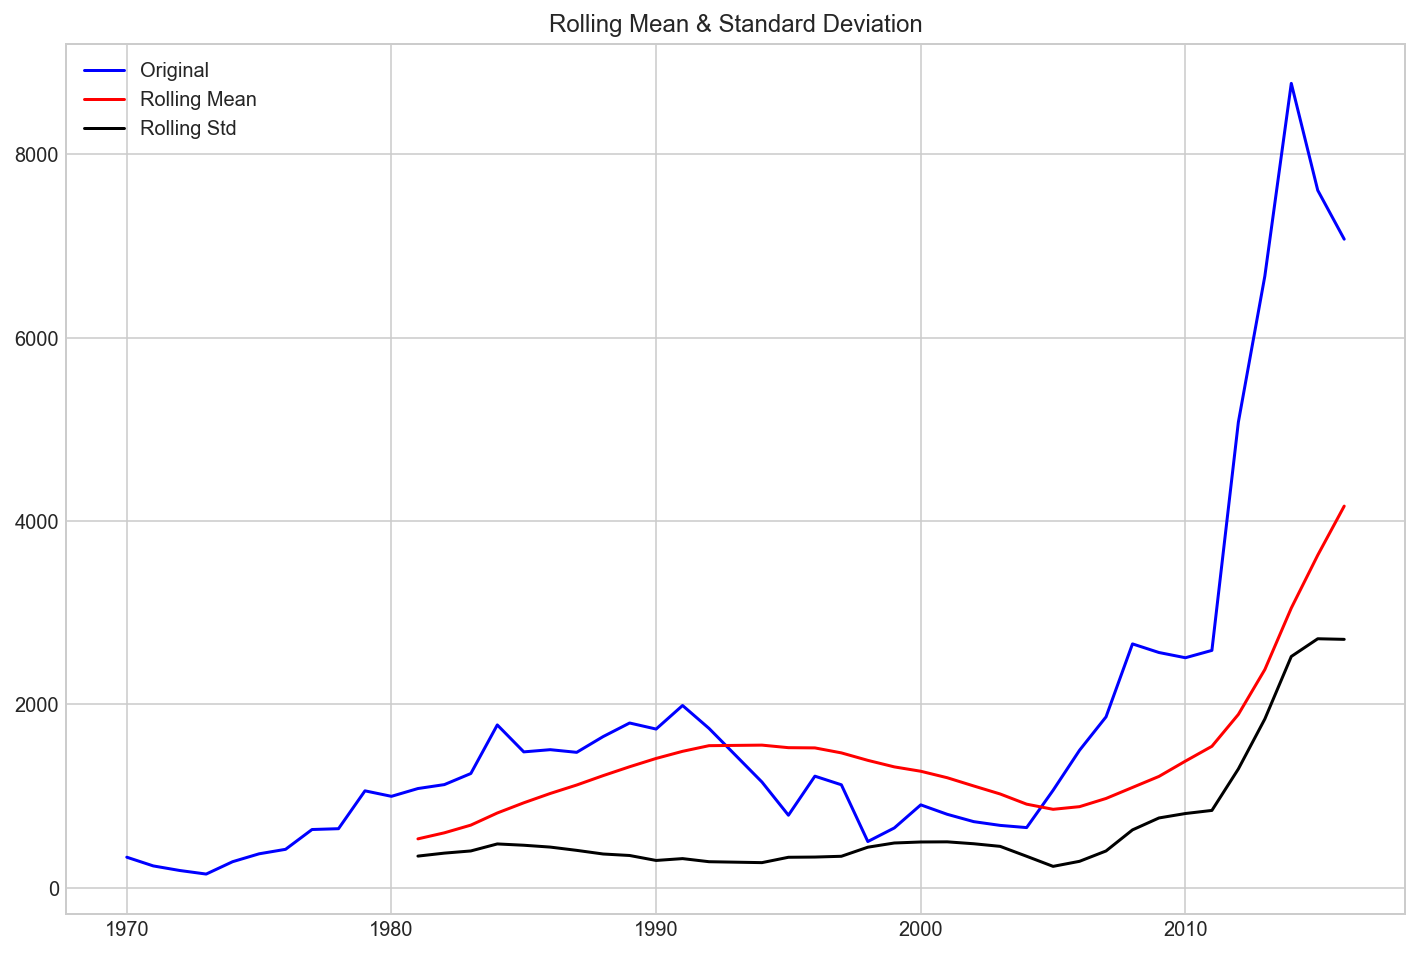

Results of Dickey-Fuller Test:
Test Statistic                 -0.595982
p-value                         0.871887
#Lags Used                      7.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


1970            NaN
1971            NaN
1972            NaN
1973            NaN
1974            NaN
1975            NaN
1976            NaN
1977            NaN
1978            NaN
1979            NaN
1980            NaN
1981     533.000000
1982     599.000000
1983     683.000000
1984     815.333333
1985     926.416667
1986    1028.250000
1987    1120.500000
1988    1223.000000
1989    1319.833333
1990    1410.416667
1991    1488.000000
1992    1549.750000
1994    1555.666667
1995    1527.833333
1996    1525.416667
1997    1471.000000
1998    1389.500000
1999    1318.333333
2000    1270.583333
2001    1199.916667
2002    1110.250000
2003    1022.666667
2004     911.666667
2005     855.416667
2006     884.333333
2007     973.750000
2008    1094.000000
2009    1214.250000
2010    1381.333333
2011    1542.750000
2012    1890.666667
2013    2379.916667
2014    3051.083333
2015    3628.416667
2016    4163.333333
Name: iyear, dtype: float64

In [56]:
test_stationarity(features_b.iyear.value_counts().sort_index(), 12)

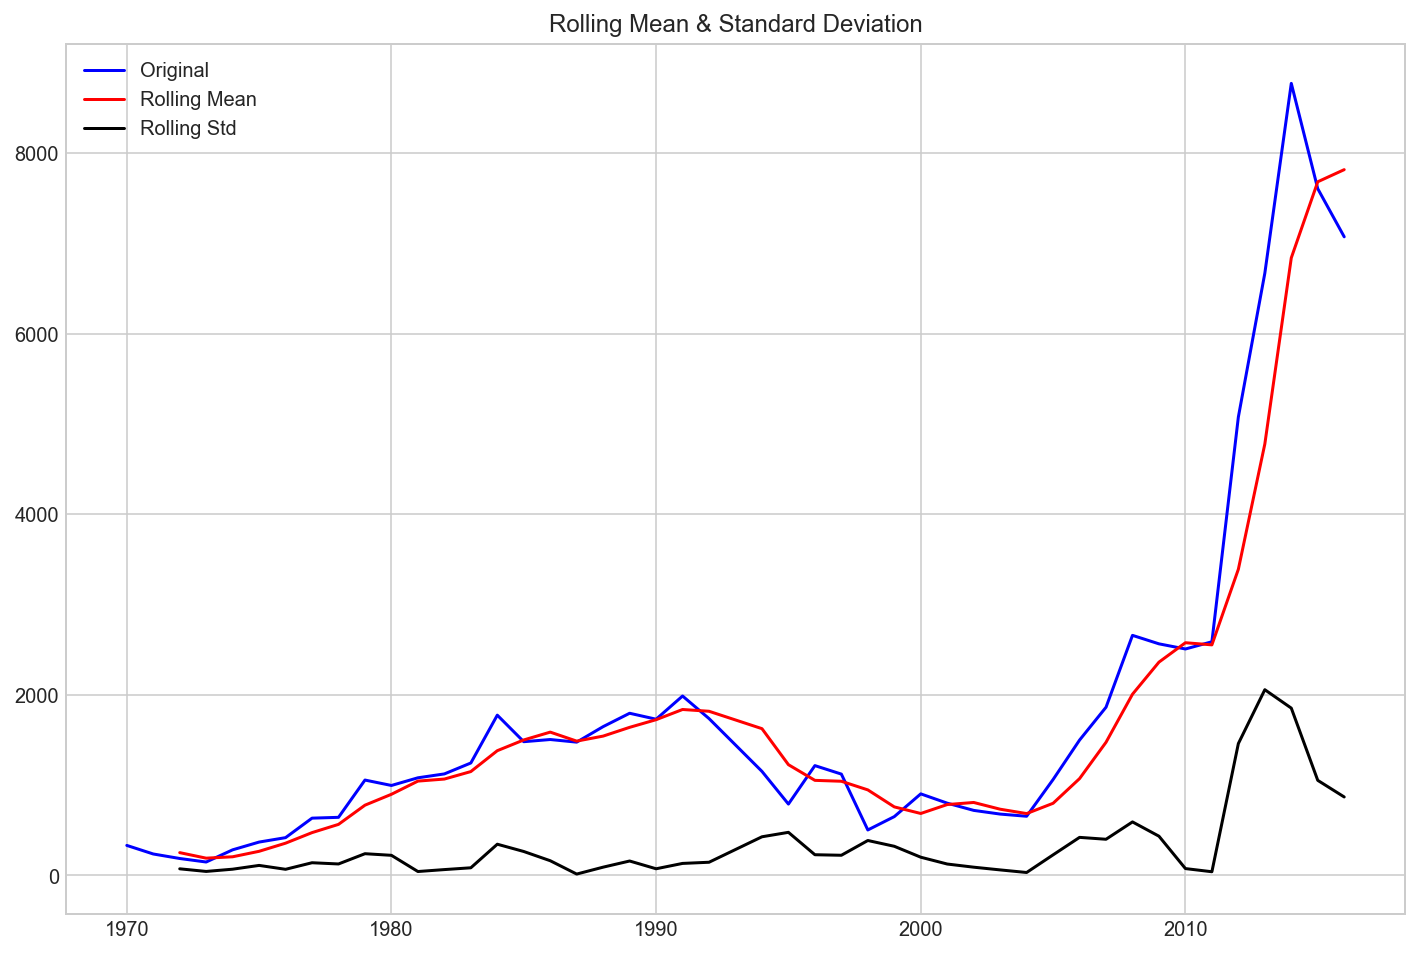

Results of Dickey-Fuller Test:
Test Statistic                 -0.595982
p-value                         0.871887
#Lags Used                      7.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


1970            NaN
1971            NaN
1972     253.000000
1973     191.666667
1974     207.000000
1975     267.666667
1976     357.666667
1977     474.666667
1978     566.000000
1979     778.666667
1980     899.333333
1981    1045.333333
1982    1068.000000
1983    1151.000000
1984    1382.333333
1985    1501.333333
1986    1588.000000
1987    1488.333333
1988    1544.000000
1989    1641.000000
1990    1725.666667
1991    1838.666667
1992    1819.000000
1994    1626.333333
1995    1227.333333
1996    1053.666667
1997    1043.666667
1998     948.000000
1999     759.666667
2000     686.666667
2001     785.666667
2002     808.666667
2003     734.000000
2004     685.666667
2005     799.666667
2006    1073.000000
2007    1475.666667
2008    2008.000000
2009    2363.333333
2010    2578.333333
2011    2554.666667
2012    3392.333333
2013    4780.000000
2014    6842.000000
2015    7685.000000
2016    7819.333333
Name: iyear, dtype: float64

In [57]:
test_stationarity(features_b.iyear.value_counts().sort_index(), 3)

In [58]:
print ((1819.000000 + 1626.333333) / 2)

1722.6666665
